In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
""" Initial Values """
k_m = 2
k_f = 1.06
k_mf = 0.02
k_fm = 0.01

m_0 = 100
f_0 = 15

In [3]:
def time_derivatives(f, m):
    df = -k_f * f + k_fm * f * m
    dm = k_m * m - k_mf * f * m
    return df, dm

def forward_method(f_0, m_0, iterations, dt):
    fox = np.zeros(iterations + 1)
    mice = np.zeros(iterations + 1)
    fox[0] = f_0
    mice[0] = m_0

    for i in range(iterations):
        # compute the change for this step
        df, dm = time_derivatives(fox[i], mice[i])
        fox[i + 1] = fox[i] + df * dt
        mice[i + 1] = mice[i] + dm * dt
    
    return fox, mice

def midpoint_method(f_0, m_0, iterations, dt):
    fox = np.zeros(iterations + 1)
    mice = np.zeros(iterations + 1)
    fox[0] = f_0
    mice[0] = m_0

    for i in range(iterations):
        # compute the values at the half step
        df, dm = time_derivatives(fox[i], mice[i])
        f = fox[i] + df * dt/2
        m = mice[i] + dm * dt/2

        # compute the real step with the half value
        df, dm = time_derivatives(f, m)
        fox[i + 1] = fox[i] + df * dt
        mice[i + 1] = mice[i] + dm * dt

    return fox, mice

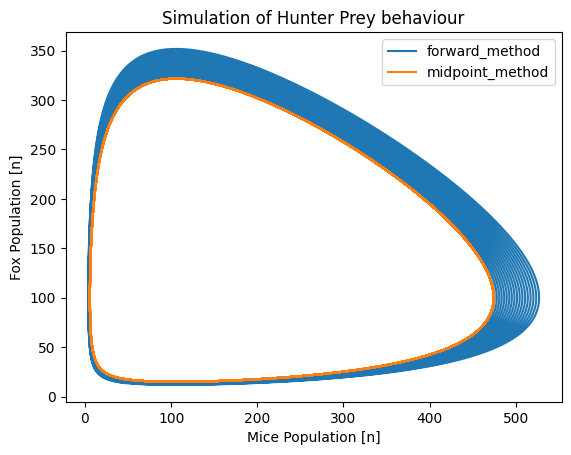

In [9]:
methods = [forward_method, midpoint_method]
for m in methods:
    fox, mice = m(f_0, m_0, 100000, 0.001)
    plt.plot(mice, fox, label=f'{m.__name__}')

plt.title("Simulation of Hunter Prey behaviour")
plt.xlabel("Mice Population [n]")
plt.ylabel("Fox Population [n]")
plt.legend()